# <center> Disney Studio Income Analysis

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns 
import warnings 
warnings.filterwarnings(action="ignore")

## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [7]:
Disney_Data = pd.read_csv("disney_movies.csv")
Disney_Data

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [8]:
Disney_Data.tail(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349
570,Alice Through the Looking Glass,2016-05-27,Adventure,PG,77042381,77042381
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
572,The BFG,2016-07-01,Adventure,PG,55483770,55483770
573,Pete’s Dragon,2016-08-12,Adventure,PG,76233151,76233151
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [14]:
Disney_Data.isna().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [15]:
Disney_Data.shape

(579, 6)

In [18]:
Disney_Data=Disney_Data.dropna()

In [19]:
Disney_Data.shape

(513, 6)

In [20]:
Disney_Data.isna().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [24]:
Disney_Data.dtypes

movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

In [28]:
def year(x):
    return x.split('-')[0]

In [30]:
'1940-02-09'.split('-')[0]

'1940'

In [31]:
Disney_Data['year']=Disney_Data['release_date'].apply(year)

In [33]:
Disney_Data.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
10,Babes in Toyland,1961-12-14,Musical,G,10218316,124841160,1961
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646,1962
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,1967


In [36]:
Disney_Data['year'].unique()

array(['1937', '1940', '1946', '1950', '1955', '1961', '1962', '1967',
       '1970', '1984', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [37]:
Disney_Data['year']=Disney_Data['year'].astype(int)

In [38]:
Disney_Data.nlargest(n=1,columns=['total_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015


In [39]:
Disney_Data.nsmallest(n=1,columns=['total_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984,2011


## Task 2: Visualize Year Distribution Plot

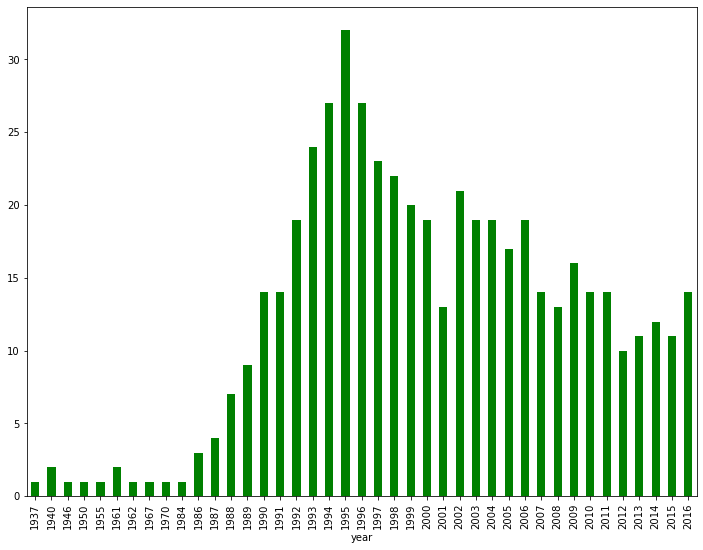

In [45]:
Disney_Data.groupby('year')['year'].count().plot(kind='bar',figsize=(12,9),color='green')

## Task 3: Does Movies Income Decreased or Increased?

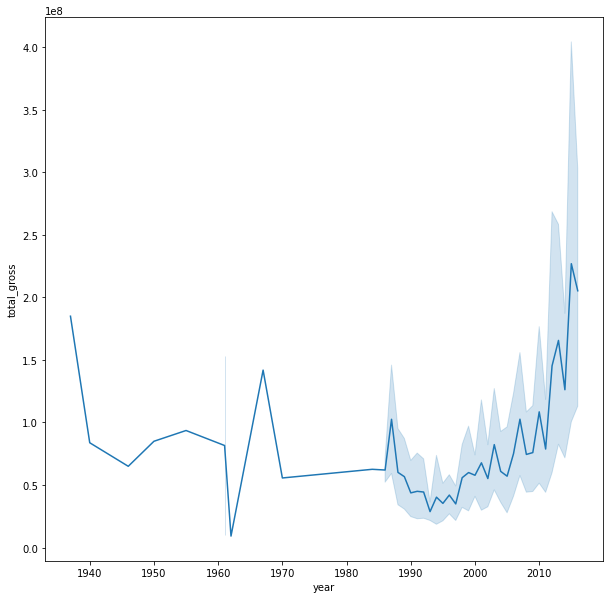

In [51]:
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(x='year',y='total_gross',data=Disney_Data)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '1937'),
  Text(1, 0, '1940'),
  Text(2, 0, '1946'),
  Text(3, 0, '1950'),
  Text(4, 0, '1955'),
  Text(5, 0, '1961'),
  Text(6, 0, '1962'),
  Text(7, 0, '1967'),
  Text(8, 0, '1970'),
  Text(9, 0, '1984'),
  Text(10, 0, '1986'),
  Text(11, 0, '1987'),
  Text(12, 0, '1988'),
  Text(13, 0, '1989'),
  Text(14, 0, '1990'),
  Text(15, 0, '1991'),
  Text(16, 0, '1992'),
  Text(17, 0, '1993'),
  Text(18, 0, '1994'),
  Text(19, 0, '1995'),
  Text(20, 0, '1996'),
  Text(21, 0, '1997'),
  Text(22, 0, '1998'),
  Text(23, 0, '1999'),
  Text(24, 0, '2000'),
  Text(25, 0, '2001'),
  Text(26, 0, '2002'),
  Text(27, 0, '2003'),
  Text(28, 0, '2004'),
  Text(29, 0, '2005'),
  Text(30, 0, '2006'),
  Text(31, 0, '2007'),
  Text(32, 0, '2008'),
  Text(33, 0, '2009'),
  Text(34, 0, '2010'),
  Text(35, 0, '

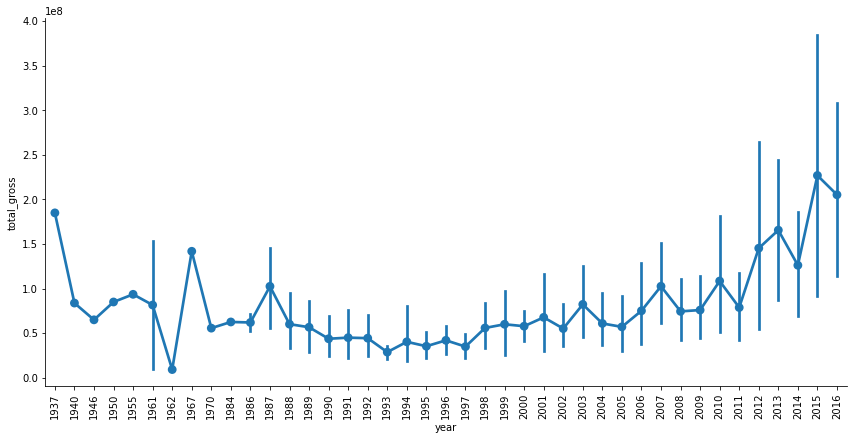

In [52]:
fg=sns.factorplot(x='year',y='total_gross',size=6,aspect=2,kinds='bar',data=Disney_Data)
plt.xticks(rotation='vertical')

## Task 4: Describe the total counts of Genres

In [54]:
Disney_Data.dtypes

movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
year                         int32
dtype: object

In [56]:
Disney_Data['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', 'Romantic Comedy',
       'Action', 'Thriller/Suspense', 'Horror', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

Text(0.5, 1.0, 'Genre')

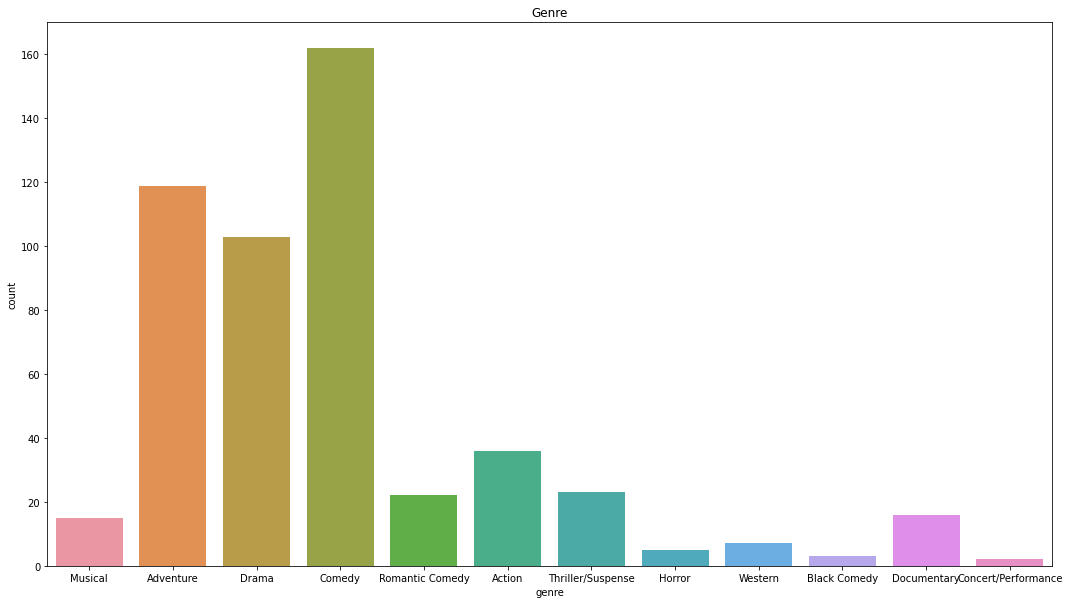

In [59]:
fig,ax=plt.subplots(figsize=(18,10))
sns.countplot(x='genre',data=Disney_Data).set_title('Genre')